## Import libraries

In [46]:
import torch
import torchvision
from torchvision import transforms, datasets
import skimage
import numpy as np
import matplotlib.pyplot as plt
import argparse
from skimage.util import random_noise
from torchvision.utils import save_image

# Download MNIST Dataset

In [47]:
train= datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [48]:
def save_noisy_image(img, name):
        img = img.view(img.size(0), 1, 28, 28)
        save_image(img, name)

normal MNIST dataset with no noises

In [73]:
def no_noise():
    for data in trainset:
        img, _ = data[0], data[1]
        norm_img = torch.tensor(random_noise(img,mean=0, var=0))
        save_noisy_image(norm_img, r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_no_noise.png")
        break

Gaussian noise, generated with Gaussian distribution with zero mean

In [49]:
def gaussian_noise():
    for data in trainset:
        img, _ = data[0], data[1]
        gauss_img = torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True))
        save_noisy_image(gauss_img, r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_gaussian.png")
        break

Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.

In [53]:
def salt_paper_noise():
    for data in trainset:
        img, _ = data[0], data[1]
        salt_img = torch.tensor(random_noise(img, mode='salt', amount=0.05))
        save_noisy_image(salt_img, r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_salt.png")
        break

The noise components are multiplied to each pixel of the original image.
The speckle noise does not follow normal distribution and quite close to Rayleigh and Gamma distributions.

In [54]:
def speckle_noise():
    for data in trainset:
        img, _ = data[0], data[1]
        speckle_img = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
        save_noisy_image(speckle_img, r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_speckle.png")
        break

In [74]:
no_noise()
gaussian_noise()
salt_paper_noise()
speckle_noise()
#save_image(utils.make_grid(torch.clip(noised_data.data, 0, 1)), "./%s/%d_%d_adv.png" % ("log", batch_idx, target_class))

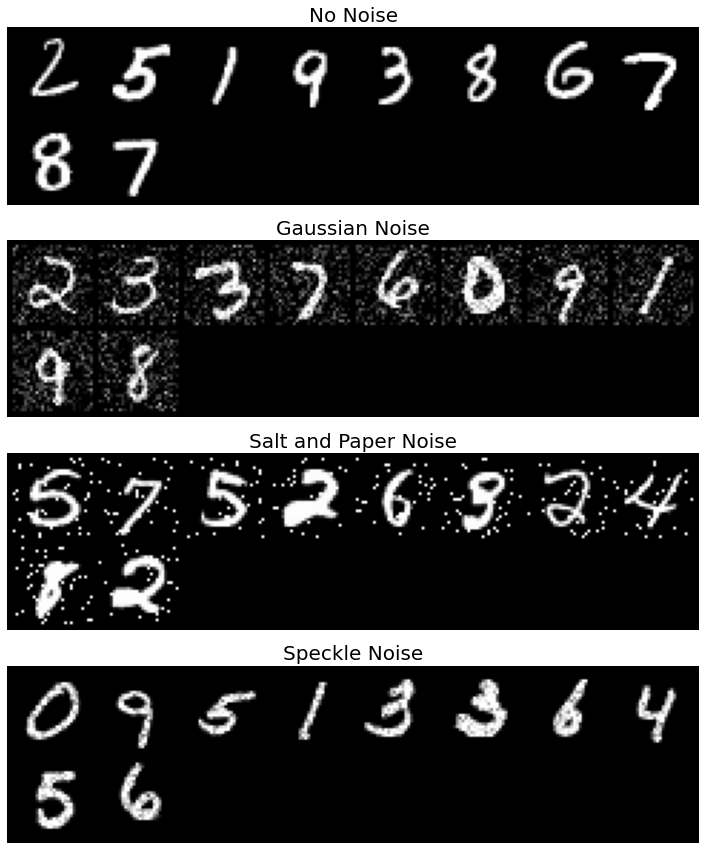

In [77]:
import cv2
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.imshow(cv2.imread(r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_no_noise.png"))
plt.axis('off')
plt.title('No Noise', fontsize=20)
plt.subplot(4,1,2)
plt.imshow(cv2.imread(r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_gaussian.png"))
plt.axis('off')
plt.title('Gaussian Noise', fontsize=20)
plt.subplot(4,1,3)
plt.imshow(cv2.imread(r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_salt.png"))
plt.axis('off')
plt.title('Salt and Paper Noise', fontsize=20)
plt.subplot(4,1,4)
plt.imshow(cv2.imread(r"/Users/kj866/Documents/Pytorch_test/noise/{dataset}_speckle.png"))
plt.axis('off')
plt.title('Speckle Noise', fontsize=20)

plt.show()